In [ ]:
using GaussianProcesses
using Random
using Plots 
using LinearAlgebra
using PyPlot

# Training data
n = 10;                          #number of training points
x = rand(Float64, n);              #predictors
y = sin.(x) + 0.05*randn(n);   #regressors

In [60]:
s = sqrt(1)
l = 0.5
mZero = MeanZero()                   #Zero mean function
kern = SE(log(l),log(s))                   #Sqaured exponential kernel (note that hyperparameters are on the log scale)

gp = GP(x,y,mZero,kern)

GP Exact object:
  Dim = 1
  Number of observations = 10
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [-0.6931471805599453, 0.0]
  Input observations = 
[0.901140804361812 0.5715482203596045 … 0.10623206322149126 0.4038737497743219]
  Output observations = [0.8188355388865853, 0.48884530938399695, 0.7095561645498715, 0.7194567325040735, 0.07347401010624229, 0.806944257070993, 0.5096660335066627, 0.42146210999504347, 0.11660798443621492, 0.45276292246125144]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = 2.584

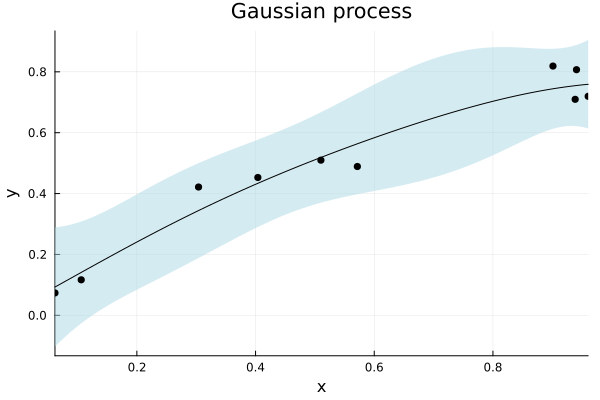

In [61]:
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP

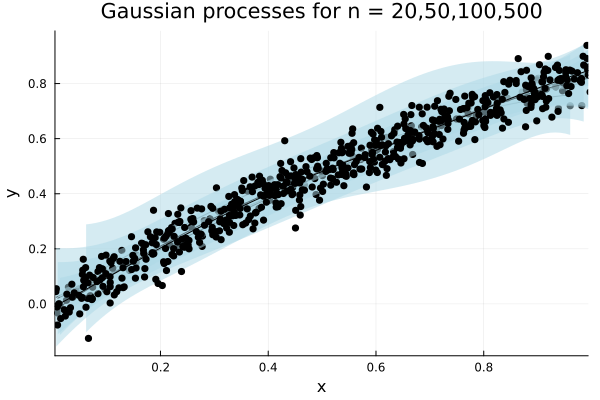

In [62]:
for n in [20,50,100,500]
    x = rand(Float64, n);             
    y = sin.(x) + 0.05*randn(n);
    gp = GP(x,y,mZero,kern)
    plot!(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP
end

title!("Gaussian processes for n = 20,50,100,500")

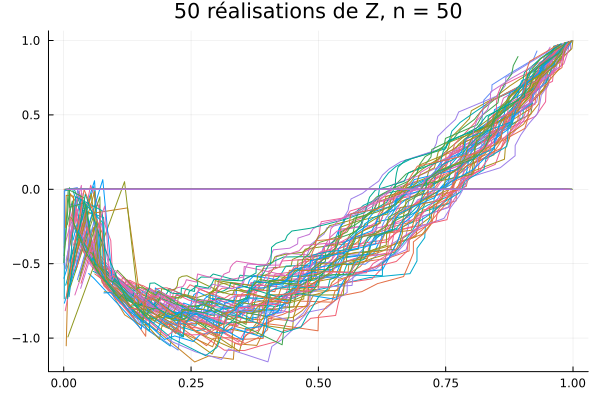

In [112]:
s = sqrt(1)
l = 0.5
n = 50

for N in 1:100
    
    x = rand(Float64, n)
    x = sort(x)
    m = zeros(n)
    Σ = s^2*exp(-x*x'/l^2)
    Ct = factorize(Σ).U


    z = m + Ct*x

    if N == 1
        plot(x,z, legend=false)
    else
        plot!(x,z, legend=false)
    end
end

title!("50 réalisations de Z, n = $n")